In [1]:
import time
import umap
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb
%run overlap_functions.ipynb

In [2]:
# Loading the voxel * gene matrix
X = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/genes_half_mask_pos_std.npy')

In [12]:
# Loading the full matrix
X_full = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/ABA_mask_pos_std.npy')

In [13]:
# Running Umap
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
reducer = umap.UMAP(n_components = 3)
embedding = reducer.fit_transform(X_full)

In [8]:
# Clustering the results
n_clusters = 30
kmeans = KMeans(n_clusters = n_clusters, n_init = 50, random_state = 0)
kmeans.fit_predict(embedding)
labels = kmeans.labels_

In [9]:
# Reconstructing the labels
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

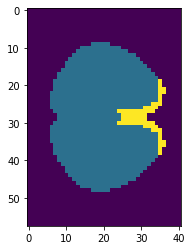

In [11]:
#Visualizing one slice
vol = labels_rc.reshape(67,58,41)
s = vol[20,:,:]
plt.imshow(s)